# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>

In this ninth notebook we face up to an optimization problem. In order to solve such problem we use genetic algorithm.

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman has to visit each one of the cities starting from a certain one and return to it at the end of the trip. The goal of the traveling salesman is to minimize the total length of the route.

Considering the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from the first city to the n$^{th}$, the optimal route is the one that minimizes the following cost function:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$).
The optimal route will be clearly a particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}.
$$

In order to represent a possible route, we resort to a 1D vector whose elements, from the first to the last, are integers that represent the cities in the order followed by the salesman. For example, for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

## The genetic algorithm

As we said, in order to obtain the solution of such a optimization problem, we resort to genetic algorithm (GA).
Such an approach was born from the observation that the story of nature is a story of a big optimization through the years. 
In this case we apply the same rules according to which the best individuals of one generation are "selected" to generate the next generation and thus make the species survive. Not only, as in nature, we resort to some operators that allow us to control the crossover between two individuals, the mutations of the individual of a new generation and the selection of the individuals.

Each route represents a chromosome, which, in this particular case, is composed by $n_{-}cities=32$ genes. Each gene represents a city that must be visited once. In this fashion, to each chromosome we associate a quantity that stand for the lenght of the route represented by the chromosome itself. This quantity is the tool that allows us to qualify the chromosomes: the shorter the path, the better the chromosome.

So, in order to obtain the best route, we generate a population of chromosomes created randomly and check that they meet the requirements of having 32 cities visited once. Then we associate to each chromosome a lenght and sort the initial population according to the goodness of the individuals (i.e. their lenght).
Thanks to the sort, we have a vector of chromosomes sorted from the best to the worst. In this fashion we can use a selection method in order to choose two individuals that are supposed to produce, by means of crossover, two other individuals.
The selection takes place according to this formula: $j= int(M \times r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 
Once the algorithm returns two good individual, let's call them "parents", they are modified into two "son", i.e. two chromosomes of a new generation. The modification takes place with a probability $p_{cross}$ and when it does not takes place the two parents are copied in the new generation. 
During the Crossover the parents are, indeed, crossed over. Pratically, we cut the parents and rewrite their missing parts using pieces of the other individual. Doing this process for both, "mum" and "dad", we obtain two sons.
Once the new generation is obtained, we subject it to mutations with a probability $p_{mut}$.
The mutations are of three different types:
1. pair permutation of random cities;
2. permutation among some contiguous random cities with some different contiguous random cities;
3. inversion of the order in which they appear in the path of some random cities.

At this point, after a number of iterations in order to have all the generations composed by the same number of individuals, we associate to each individual the length of its route and sort the new generation.

The code written for these exercises can be useful to solve two different optimization problems: TSP with cities on a circumference and TSP with cities in a square.

N.B.: in each chromosome, we set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.

## Cities on a circumference

First of all, we write a code implemeting genetic algorithm on a set of $n_{-}cities=32$ cities disposed on a circumference with radius $r= 10$. This is done in order to check if the code is correct; indeed, in this case, the solution of the optimization problem is trivial since the best route is expected to be the circumference itself. We set arbitrarily the power of selection procedure $p=2$, the Crossover probability $p_{cross}=0.6$ and the mutations probability $p_{mut}=0.05$.
The program works on $3000$ generations of $800$ routes each.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
x_best_circ, y_best_circ = np.loadtxt("data/circumference/Best_route.dat", usecols=(0,1), unpack=True)
x_circ, y_circ = np.loadtxt("data/circumference/pos_cities.dat", usecols=(0,1), unpack=True)
n_cities=len(x_best_circ)

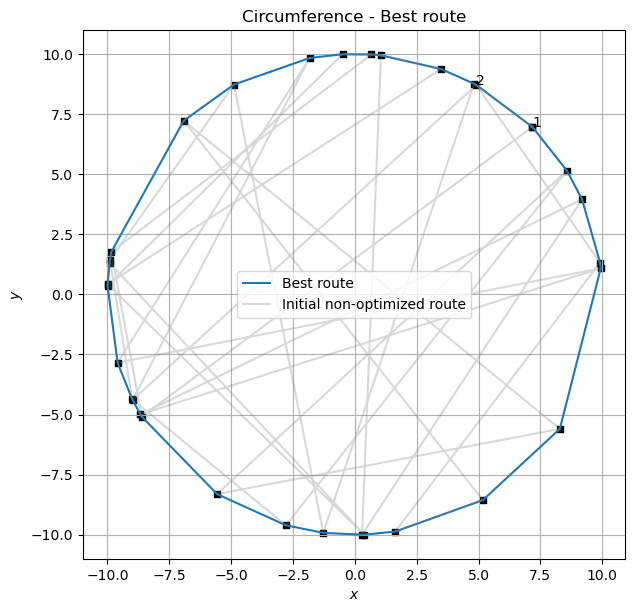

In [3]:
figure = plt.figure(figsize=(7,7), dpi=100)
plt.plot(x_best_circ,y_best_circ, label="Best route")

plt.annotate(str(1), (x_best_circ[0], y_best_circ[0]))  
plt.annotate(str(2), (x_best_circ[1], y_best_circ[1]))
plt.plot(x_circ,y_circ, color='grey', alpha=0.3, label="Initial non-optimized route")
plt.scatter(x_best_circ,y_best_circ, marker ='s', s=20, color = 'black')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Circumference - Best route')
plt.grid(True)
plt.legend()

plt.show()

In the above plot we show the optimal route (blue) and the initial non-optimized route (grey). We can observe that, as expected, the best route is a circumference. In particular, we also put two numbers indicating the first two cities visited.

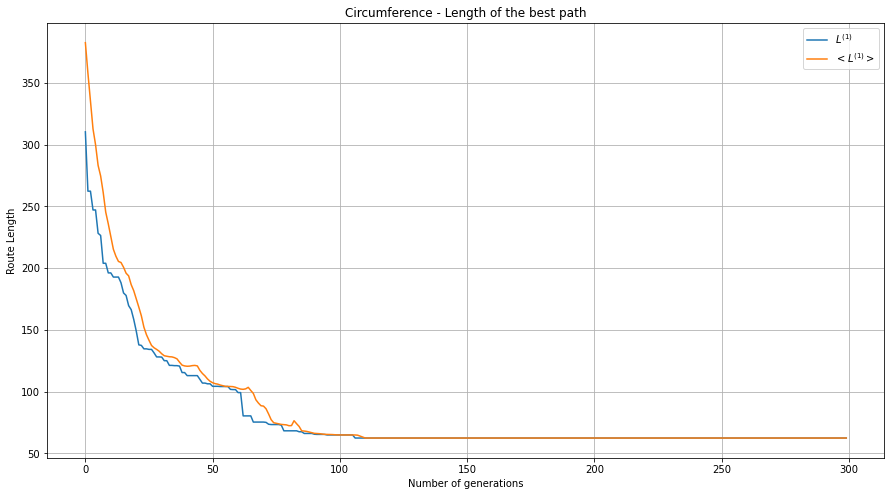

Length of the best route after 3000 generations: 62.403


In [4]:
gen_circ, l1_circ, l2_circ = np.loadtxt("data/circumference/Best_lengths.dat", usecols=(0,1,2), max_rows= 300, unpack=True)

fig= plt.figure(figsize=(15,8))
plt.plot(gen_circ,l1_circ, label="$L^{(1)}$")
plt.plot(gen_circ,l2_circ, color='C1', label="$<L^{(1)}>$")
plt.xlabel('Number of generations')
plt.ylabel('Route Length')
plt.title('Circumference - Length of the best path')
plt.grid(True)
plt.legend()
plt.show()

gen, best = np.loadtxt("data/circumference/Best_lengths.dat", usecols=(0,1), skiprows=300, unpack=True)
print("Length of the best route after", int(gen[-1]), "generations:", best[-1])

We can observe that the cost function reaches the minimum after about 150 generations. The minimum is $62.403$, which is compatible with the length of a circumference with radius $r=10$.

Being that the algorithm works well on a trivial case, we can now generalize to a more complicated case, randomly distributing the cities inside a square with edges $l = 10$.
We mantain the same values of $p$, $p_{cross}$ and $p_{mut}$ used in the previous case. The numbers of generations and routes for each population remain unchanged.

In [5]:
x_best_sq, y_best_sq = np.loadtxt("data/square/Best_route.dat", usecols=(0,1), unpack=True)
x_sq, y_sq = np.loadtxt("data/square/pos_cities.dat", usecols=(0,1), unpack=True)
n_cities=len(x_best_sq)

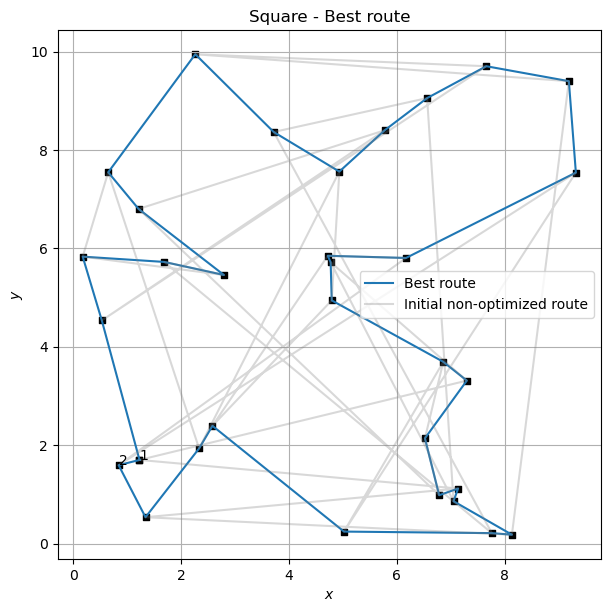

In [6]:
figure = plt.figure(figsize=(7,7), dpi=100)
plt.plot(x_best_sq,y_best_sq, label="Best route")
#for i in range(n_cities):
 #   plt.annotate(str(i), (x_best[i],y_best[i]))

plt.annotate(str(1), (x_best_sq[0], y_best_sq[0]))  
plt.annotate(str(2), (x_best_sq[1], y_best_sq[1]))
plt.plot(x_sq,y_sq, color='grey', alpha=0.3, label="Initial non-optimized route")
plt.scatter(x_best_sq,y_best_sq, marker ='s', s=20, color = 'black')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Square - Best route')
plt.grid(True)
plt.legend()

plt.show()

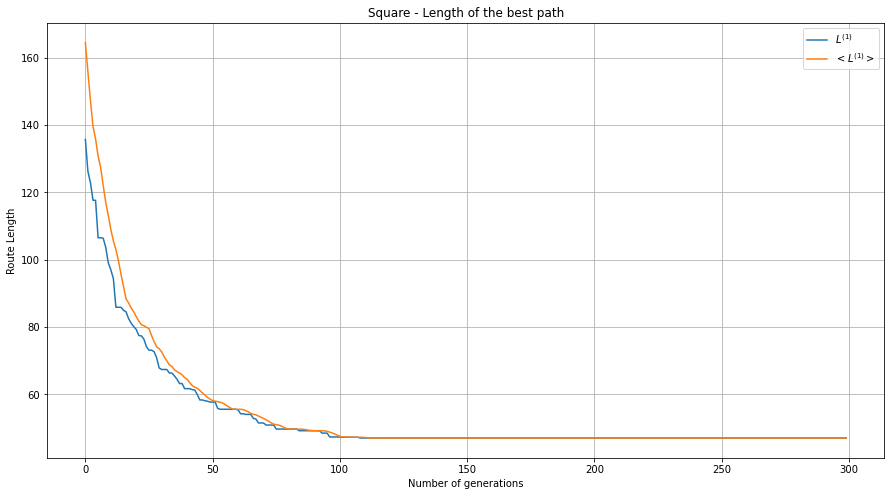

Length of the best route after 1500 generations: 46.9945


In [7]:
gen_sq, l1_sq, l2_sq = np.loadtxt("data/square/Best_lengths.dat", usecols=(0,1,2), max_rows= 300, unpack=True)

fig= plt.figure(figsize=(15,8))
plt.plot(gen_sq,l1_sq, label="$L^{(1)}$")
plt.plot(gen_sq,l2_sq, color='C1', label="$<L^{(1)}>$")
plt.xlabel('Number of generations')
plt.ylabel('Route Length')
plt.title('Square - Length of the best path')
plt.grid(True)
plt.legend()
plt.show()

gen_sq, best_sq = np.loadtxt("data/square/Best_lengths.dat", usecols=(0,1), skiprows=300, unpack=True)
print("Length of the best route after", int(gen_sq[-1]), "generations:", best_sq[-1])

Also in this case we can see that the algorithm finds the optimal route after about $150$ generations.

At this point, thanks to an observation made on the exercise 10.1, we ask ourselves which are the best parameters $p$, $p_{cross}$ and $p_{mut}$. In particular we wonder what is the relationship between these values and the convergence of the algorithm to the solution.
First of all, we change the values of $p$ mantaining the same $p_{cross}$ and $p_{mut}$.

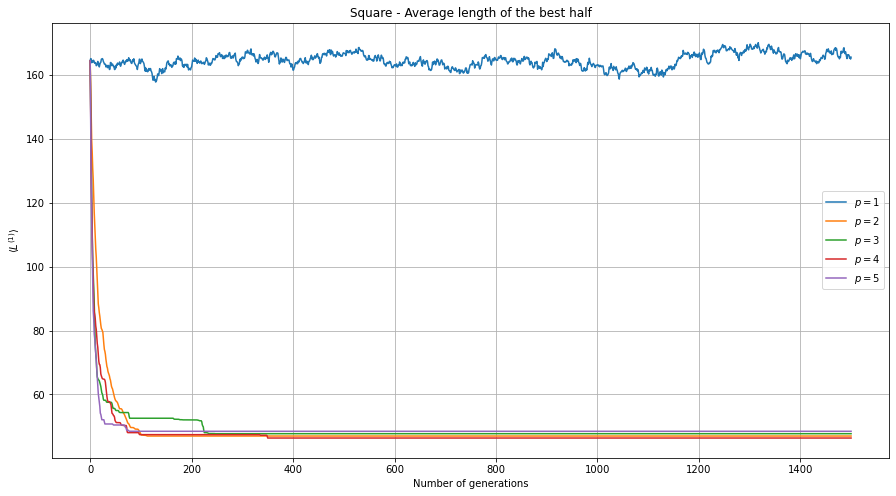

In [8]:
gen_power_1, l2_power_1=np.loadtxt("data/square/selection/power1/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_power_2, l2_power_2=np.loadtxt("data/square/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_power_3, l2_power_3=np.loadtxt("data/square/selection/power3/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_power_4, l2_power_4=np.loadtxt("data/square/selection/power4/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_power_5, l2_power_5=np.loadtxt("data/square/selection/power5/Best_lengths.dat",  usecols=(0,2), unpack=True)

fig= plt.figure(figsize=(15,8))

plt.plot(gen_power_1, l2_power_1, label="$p = 1$")
plt.plot(gen_power_2, l2_power_2, color='C1', label="$p = 2$")
plt.plot(gen_power_3, l2_power_3, color='C2', label="$p = 3$")
plt.plot(gen_power_4, l2_power_4, color='C3', label="$p = 4$")
plt.plot(gen_power_5, l2_power_5, color='C4', label="$p = 5$")

plt.xlabel('Number of generations')
plt.ylabel(r"$\langle L ^{(1)} \rangle$")
plt.title('Square - Average length of the best half')

plt.grid(True)
plt.legend()
plt.show()

Zooming from the 200th generation to the 600th and neglecting the case for $p=1$:

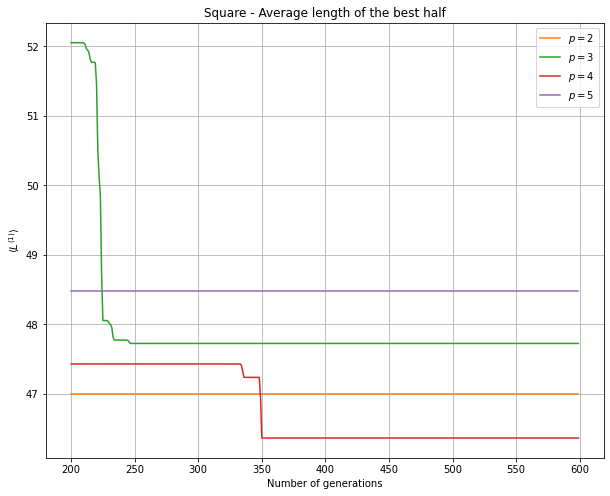

In [9]:
#gen_power_1, l2_power_1=np.loadtxt("data/square/selection/power1/Best_lengths.dat",  usecols=(0,2), skiprows= 200, max_rows= 400, unpack=True)
gen_power_2, l2_power_2=np.loadtxt("data/square/Best_lengths.dat",  usecols=(0,2), skiprows= 200, max_rows= 400, unpack=True)
gen_power_3, l2_power_3=np.loadtxt("data/square/selection/power3/Best_lengths.dat", skiprows= 200, max_rows= 400, usecols=(0,2), unpack=True)
gen_power_4, l2_power_4=np.loadtxt("data/square/selection/power4/Best_lengths.dat", skiprows= 200, max_rows= 400, usecols=(0,2), unpack=True)
gen_power_5, l2_power_5=np.loadtxt("data/square/selection/power5/Best_lengths.dat", skiprows= 200, max_rows= 400, usecols=(0,2), unpack=True)

fig= plt.figure(figsize=(10,8))

#plt.plot(gen_power_1, l2_power_1, label="$p = 1$")
plt.plot(gen_power_2, l2_power_2, color='C1', label="$p = 2$")
plt.plot(gen_power_3, l2_power_3, color='C2', label="$p = 3$")
plt.plot(gen_power_4, l2_power_4, color='C3', label="$p = 4$")
plt.plot(gen_power_5, l2_power_5, color='C4', label="$p = 5$")

plt.xlabel('Number of generations')
plt.ylabel(r"$\langle L ^{(1)} \rangle$")
plt.title('Square - Average length of the best half')

plt.grid(True)
plt.legend()
plt.show()

We can observe that $p=4$ represents the optimum choice for the power in the selection procedure. For this reason we decide to set $p=4$ for the next simulations. Clearly we can already conclude that the result obtained before is not the real optimal route since it was obtained with $p=2$.

At this point we can look for the best crossover probability $p_{corr}$, with $p$ and $p_{mut}$ fixed.

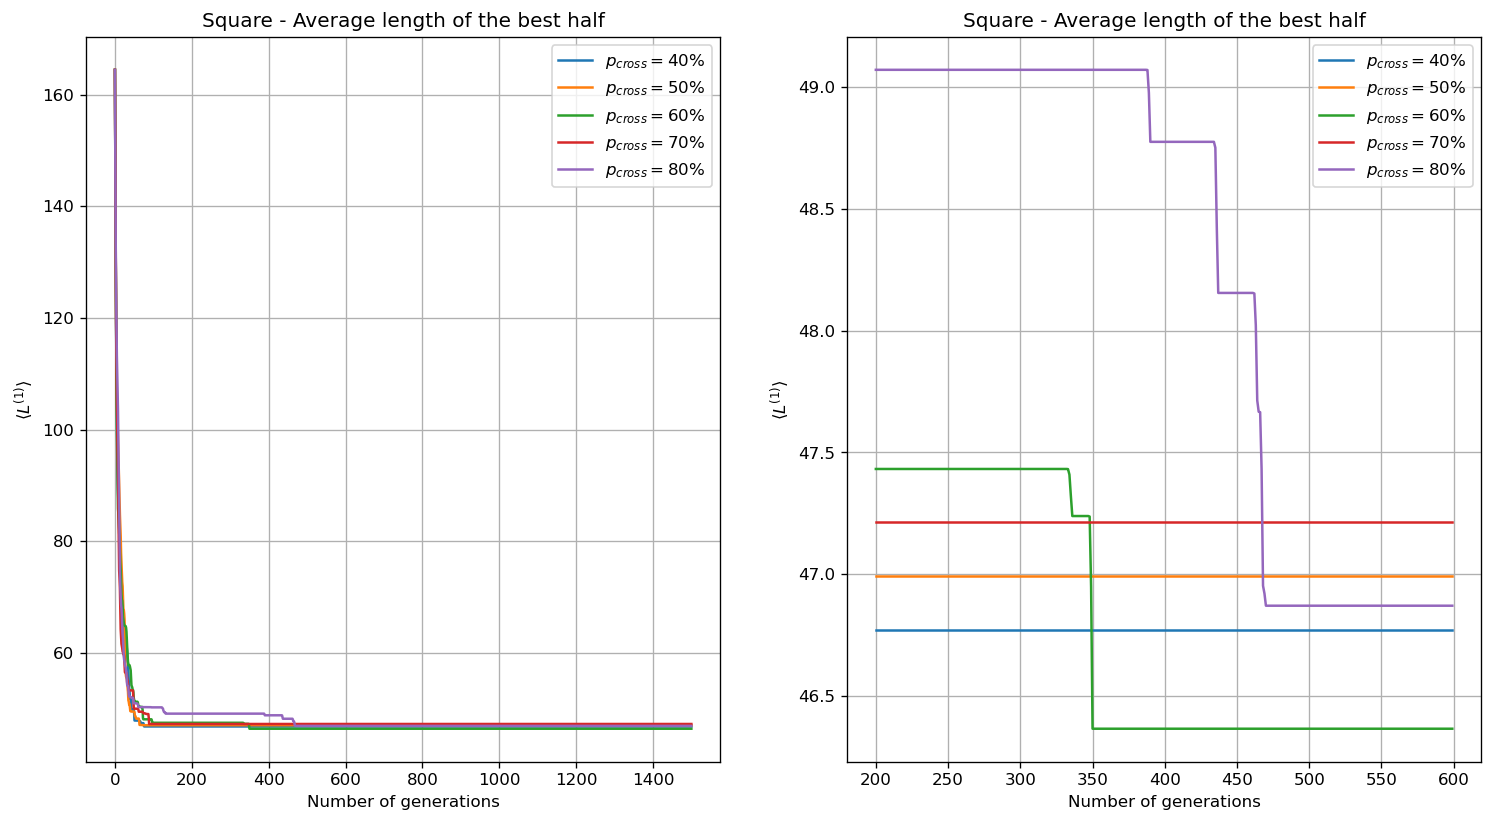

In [10]:
gen_cross_40, l2_cross_40=np.loadtxt("data/square/crossover/p40/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_cross_50, l2_cross_50=np.loadtxt("data/square/crossover/p50/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_cross_60, l2_cross_60=np.loadtxt("data/square/crossover/p60/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_cross_70, l2_cross_70=np.loadtxt("data/square/crossover/p70/Best_lengths.dat",  usecols=(0,2), unpack=True)
gen_cross_80, l2_cross_80=np.loadtxt("data/square/crossover/p80/Best_lengths.dat",  usecols=(0,2), unpack=True)

gen_cross_40_zoom, l2_cross_40_zoom=np.loadtxt("data/square/crossover/p40/Best_lengths.dat",  usecols=(0,2), skiprows= 200, max_rows= 400, unpack=True)
gen_cross_50_zoom, l2_cross_50_zoom=np.loadtxt("data/square/crossover/p50/Best_lengths.dat",  usecols=(0,2), skiprows= 200, max_rows= 400, unpack=True)
gen_cross_60_zoom, l2_cross_60_zoom=np.loadtxt("data/square/crossover/p60/Best_lengths.dat",  usecols=(0,2), skiprows= 200, max_rows= 400, unpack=True)
gen_cross_70_zoom, l2_cross_70_zoom=np.loadtxt("data/square/crossover/p70/Best_lengths.dat",  usecols=(0,2), skiprows= 200, max_rows= 400, unpack=True)
gen_cross_80_zoom, l2_cross_80_zoom=np.loadtxt("data/square/crossover/p80/Best_lengths.dat",  usecols=(0,2), skiprows= 200, max_rows= 400, unpack=True)



fig, (plt1,plt2) = plt.subplots(1,2, figsize=(15, 8), dpi=120)

plt1.plot(gen_cross_40, l2_cross_40, label="$p_{cross} = 40 \%$")
plt1.plot(gen_cross_50, l2_cross_50, label="$p_{cross} = 50 \%$")
plt1.plot(gen_cross_60, l2_cross_60, label="$p_{cross} = 60\%$")
plt1.plot(gen_cross_70, l2_cross_70, label="$p_{cross} = 70\%$")
plt1.plot(gen_cross_80, l2_cross_80, label="$p_{cross} = 80\%$")

plt2.plot(gen_cross_40_zoom, l2_cross_40_zoom, label="$p_{cross} = 40\%$")
plt2.plot(gen_cross_50_zoom, l2_cross_50_zoom, label="$p_{cross} = 50\%$")
plt2.plot(gen_cross_60_zoom, l2_cross_60_zoom, label="$p_{cross} = 60\%$")
plt2.plot(gen_cross_70_zoom, l2_cross_70_zoom, label="$p_{cross} = 70\%$")
plt2.plot(gen_cross_80_zoom, l2_cross_80_zoom, label="$p_{cross} = 80\%$")


plt1.set_xlabel('Number of generations')
plt1.set_ylabel(r"$\langle L ^{(1)} \rangle$")
plt1.set_title('Square - Average length of the best half')

plt2.set_xlabel('Number of generations')
plt2.set_ylabel(r"$\langle L ^{(1)} \rangle$")
plt2.set_title('Square - Average length of the best half')


plt1.grid(True)
plt2.grid(True)
plt1.legend()
plt2.legend()
plt.show()

In the above plots we show the average lenghts for different values of $p_{corr}$ as functions of the number of generations. We can observe that the best route is obtained for $p_{corr} = 60\%$.

Finally, fixed $p_{corr} = 60\%$ and $p= 4$, we look for the best $p_{mut}$.


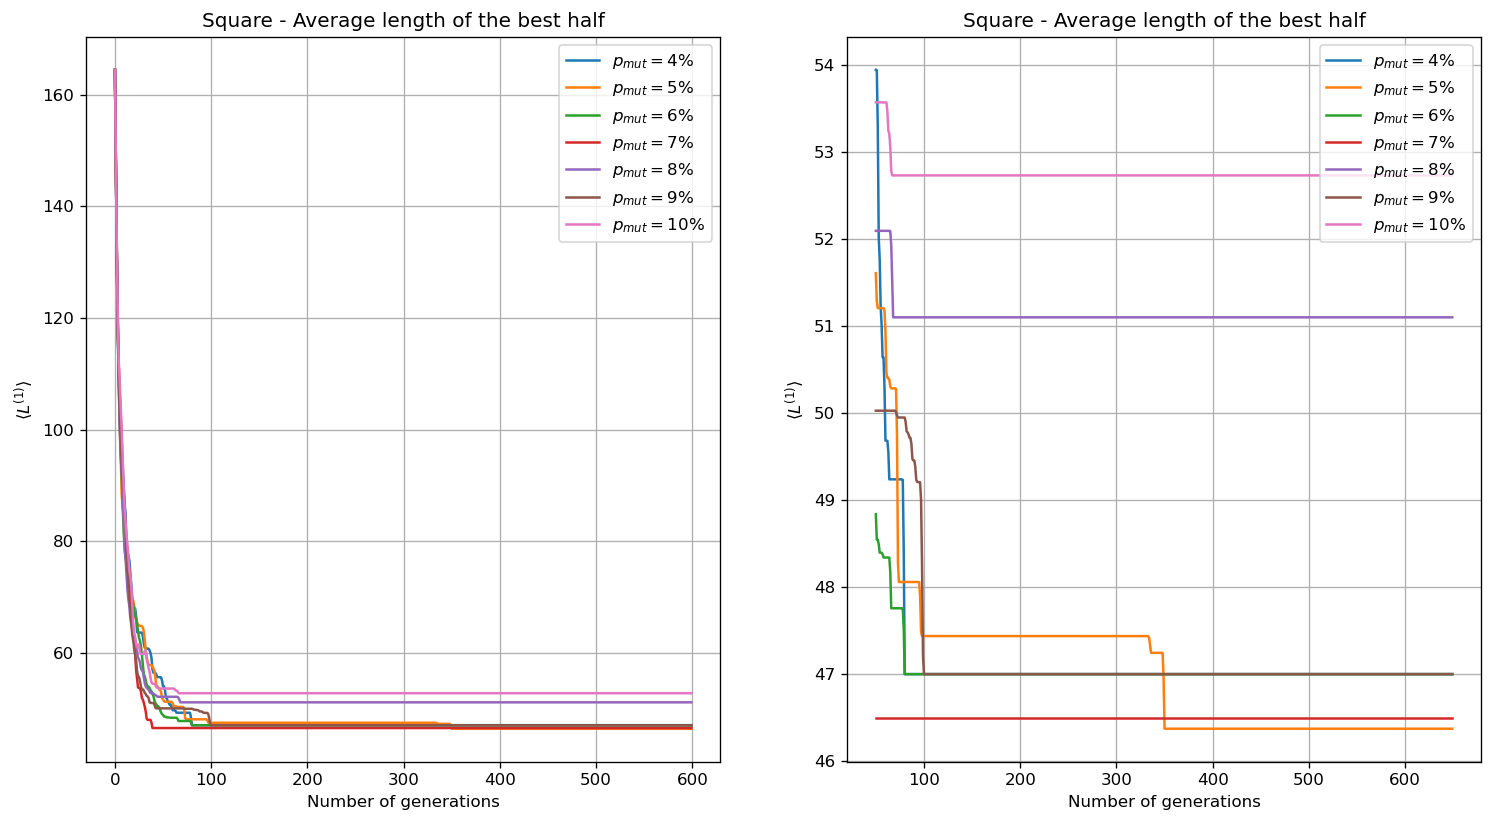

In [11]:
gen_mut_4, l2_mut_4=np.loadtxt("data/square/mutation/p4/Best_lengths.dat",  usecols=(0,2), max_rows= 600, unpack=True)
gen_mut_5, l2_mut_5=np.loadtxt("data/square/crossover/p60/Best_lengths.dat",  usecols=(0,2), max_rows= 600, unpack=True)
gen_mut_6, l2_mut_6=np.loadtxt("data/square/mutation/p6/Best_lengths.dat",  usecols=(0,2), max_rows= 600, unpack=True)
gen_mut_7, l2_mut_7=np.loadtxt("data/square/mutation/p7/Best_lengths.dat",  usecols=(0,2), max_rows= 600, unpack=True)
gen_mut_8, l2_mut_8=np.loadtxt("data/square/mutation/p8/Best_lengths.dat",  usecols=(0,2), max_rows= 600, unpack=True)
gen_mut_9, l2_mut_9=np.loadtxt("data/square/mutation/p9/Best_lengths.dat",  usecols=(0,2), max_rows= 600, unpack=True)
gen_mut_10, l2_mut_10=np.loadtxt("data/square/mutation/p10/Best_lengths.dat",  usecols=(0,2), max_rows= 600, unpack=True)


gen_mut_4_zoom, l2_mut_4_zoom=np.loadtxt("data/square/mutation/p4/Best_lengths.dat",  usecols=(0,2), skiprows= 50, max_rows= 600, unpack=True)
gen_mut_5_zoom, l2_mut_5_zoom=np.loadtxt("data/square/crossover/p60/Best_lengths.dat",  usecols=(0,2), skiprows= 50, max_rows= 600, unpack=True)
gen_mut_6_zoom, l2_mut_6_zoom=np.loadtxt("data/square/mutation/p6/Best_lengths.dat",  usecols=(0,2), skiprows= 50, max_rows= 600, unpack=True)
gen_mut_7_zoom, l2_mut_7_zoom=np.loadtxt("data/square/mutation/p7/Best_lengths.dat",  usecols=(0,2), skiprows= 50, max_rows= 600, unpack=True)
gen_mut_8_zoom, l2_mut_8_zoom=np.loadtxt("data/square/mutation/p8/Best_lengths.dat",  usecols=(0,2), skiprows= 50, max_rows= 600, unpack=True)
gen_mut_9_zoom, l2_mut_9_zoom=np.loadtxt("data/square/mutation/p9/Best_lengths.dat",  usecols=(0,2), skiprows= 50, max_rows= 600, unpack=True)
gen_mut_10_zoom, l2_mut_10_zoom=np.loadtxt("data/square/mutation/p10/Best_lengths.dat",  usecols=(0,2), skiprows= 50, max_rows= 600, unpack=True)


fig, (plt1,plt2) = plt.subplots(1,2, figsize=(15, 8), dpi=120)

plt1.plot(gen_mut_4, l2_mut_4, label="$p_{mut} = 4 \%$")
plt1.plot(gen_mut_5, l2_mut_5, label="$p_{mut} = 5\%$")
plt1.plot(gen_mut_6, l2_mut_6, label="$p_{mut} = 6\%$")
plt1.plot(gen_mut_7, l2_mut_7, label="$p_{mut} = 7\%$")
plt1.plot(gen_mut_8, l2_mut_8, label="$p_{mut} = 8\%$")
plt1.plot(gen_mut_9, l2_mut_9, label="$p_{mut} = 9\%$")
plt1.plot(gen_mut_10, l2_mut_10, label="$p_{mut} = 10\%$")

plt2.plot(gen_mut_4_zoom, l2_mut_4_zoom, label="$p_{mut} = 4\%$")
plt2.plot(gen_mut_5_zoom, l2_mut_5_zoom, label="$p_{mut} = 5\%$")
plt2.plot(gen_mut_6_zoom, l2_mut_6_zoom, label="$p_{mut} = 6\%$")
plt2.plot(gen_mut_7_zoom, l2_mut_7_zoom, label="$p_{mut} = 7\%$")
plt2.plot(gen_mut_8_zoom, l2_mut_8_zoom, label="$p_{mut} = 8\%$")
plt2.plot(gen_mut_9_zoom, l2_mut_9_zoom, label="$p_{mut} = 9\%$")
plt2.plot(gen_mut_10_zoom, l2_mut_10_zoom, label="$p_{mut} = 10\%$")


plt1.set_xlabel('Number of generations')
plt1.set_ylabel(r"$\langle L ^{(1)} \rangle$")
plt1.set_title('Square - Average length of the best half')

plt2.set_xlabel('Number of generations')
plt2.set_ylabel(r"$\langle L ^{(1)} \rangle$")
plt2.set_title('Square - Average length of the best half')


plt1.grid(True)
plt2.grid(True)
plt1.legend()
plt2.legend()
plt.show()

In the above plots we show the average lenghts for different values of $p_{mut}$ as functions of the number of generations. We can conclude that the best $p_{mut}$ is $5 \%$.

In conclusion we execute a simulation with the best parameters found after such analysis. We run the code with $p= 4$, $p_{corr} = 60 \%$ and $p_{mut} = 5 \%$.

In [12]:
x_best_sq_final, y_best_sq_final = np.loadtxt("data/square/final/Best_route.dat", usecols=(0,1), unpack=True)
x_sq_final, y_sq_final = np.loadtxt("data/square/final/pos_cities.dat", usecols=(0,1), unpack=True)
n_cities=len(x_best_sq_final)

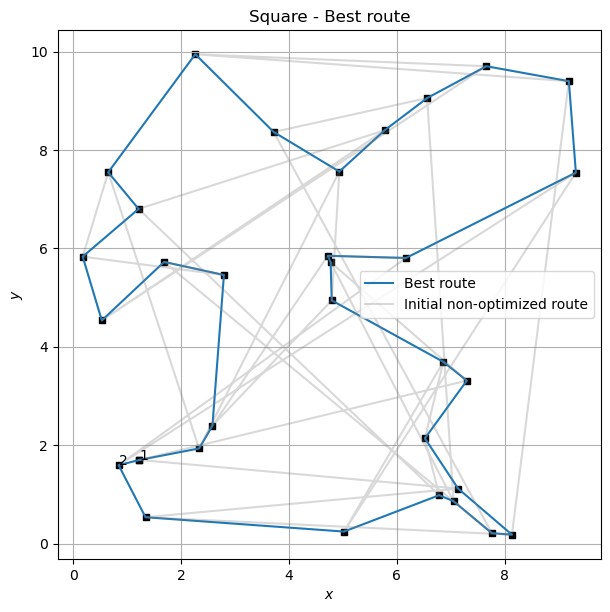

In [13]:
figure = plt.figure(figsize=(7,7), dpi=100)
plt.plot(x_best_sq_final,y_best_sq_final, label="Best route")
#for i in range(n_cities):
 #   plt.annotate(str(i), (x_best[i],y_best[i]))

plt.annotate(str(1), (x_best_sq_final[0], y_best_sq_final[0]))  
plt.annotate(str(2), (x_best_sq_final[1], y_best_sq_final[1]))
plt.plot(x_sq_final,y_sq_final, color='grey', alpha=0.3, label="Initial non-optimized route")
plt.scatter(x_best_sq_final,y_best_sq_final, marker ='s', s=20, color = 'black')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Square - Best route')
plt.grid(True)
plt.legend()

plt.show()

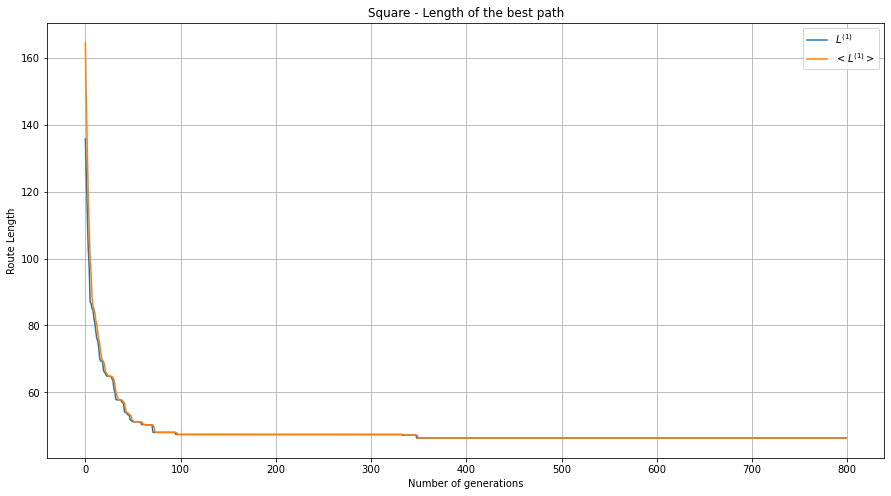

Length of the best route after 3000 generations: 46.3666


In [14]:
gen_sq_final, l1_sq_final, l2_sq_final = np.loadtxt("data/square/final/Best_lengths.dat", usecols=(0,1,2), max_rows= 800, unpack=True)

fig= plt.figure(figsize=(15,8))
plt.plot(gen_sq_final,l1_sq_final, label="$L^{(1)}$")
plt.plot(gen_sq_final,l2_sq_final, color='C1', label="$<L^{(1)}>$")
plt.xlabel('Number of generations')
plt.ylabel('Route Length')
plt.title('Square - Length of the best path')
plt.grid(True)
plt.legend()
plt.show()

gen_sq_final, best_sq_final = np.loadtxt("data/square/final/Best_lengths.dat", usecols=(0,1), skiprows=800, unpack=True)
print("Length of the best route after", int(gen_sq_final[-1]), "generations:", best_sq_final[-1])

We can observe that, as long as we run the code for a few more generations than $150$, the best lenght beyond $46.9945$, value found earlier, and reaches $46.3666$. Furthermore, the trend of the average and the trend of the best length are nearer than before.